# Image Processing with Python

A [tutorial](https://datacarpentry.org/image-processing/) on using Python for image processing

## Introduction

* __morphometrics__ - counting the number of objects in an image, analyzing the size of objects, or analyzing the shape of the objects
* __colorimetrics__ - analyzing the color of objects in an image

## Image Basics

* Numbers are stored in base 2 in computers
* Group of eight bits is called a byte
* Convention is to use a left-hand coordinate system where $(0,0)$ is in the top left corner and only positive coordinates are used (postive $x$ to the right and positive $y$ down)
* Most common color model is RGB
* Each primary color is called a __channel__
* Range is $[0,255]$
* Each color channel value is stored in a byte (8 bits) which can represent exactly 256 values
* There are 3 channels, so this is called __24-bit color depth__

_Exercise:_
What colors are represented by these RGB triplets?
1. _(255,0,0)_ Red
2. _(0,255,0)_ Green
3. _(0,0,255)_ Blue
4. _(255,255,255)_ White
5. _(0,0,0)_ Black
6. _(128,128,128)_ Grey

_Exercise:_
_How many possible colors can be represented with the 24-bit RGB model?_ $2^{24}$ because each of the 24 bits can have 2 different values

* Can also have different bit depths
* __raster graphics__ - where each point in an image is a square point of colored light where the color has a 24-bit depth
* Will encounter 3 main image types: BMP, JPEG, and TIFF
* BMP 
    * Matches most closely with array conceptualization but in 1D where rows in the image are stored in order ($y=0$, $y=1$, etc.)
    * Not compressed, so large file sizes
* JPEG
    * Most common
    * Uses lossy compression that can be tuned
* TIFF
    * Popular with publishers, graphic designers, and photographers
    * Uncompressed or compressed using lossless or lossy
    * Main disadvantage: not universally readable
    
### Compression

_Exercise:_
_How much storage is required for a 5,000x5,000 image of nothing but white pixels?_ 24 bits for each pixel and 5,000x5,000 pixels = $6 \times 10^8$ bits or 71.5 MB

* Compression can be either lossless or lossy
* Lossless
    * Apply an algorithm to compress then reverse to recover image
    * Image is exactly the same as original
    * .zip or .gz archives use lossless compression
* Lossy
    * Discards some of the original detail
    * Amount of loss can often be tuned
    * Detail is truly lost and cannot be recovered
    
_Exercise:_
 * image-processing/code/02-image-basics/ws.py
 * Python program to create an image containing a single, white square.
 * The image is saved in two formats: bmp and jpg.

In [1]:
# Import libraries
import skimage.io
import numpy as np
import os

In [2]:
# Set the size of the image
dim = 5000

In [3]:
# Create an array of that size squared with a third dimension for the RGB values
# Then fill it with 255 to indicate an all-white image
img = np.zeros((dim, dim, 3), dtype="uint8")
img.fill(255)

In [4]:
# Save the image as both BMP and JPEG
skimage.io.imsave(fname="ws.bmp", arr=img)
skimage.io.imsave(fname="ws.jpg", arr=img)

/home/laurarnichols/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: ws.bmp is a low contrast image
  
/home/laurarnichols/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: ws.jpg is a low contrast image
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
# Get BMP file size in bytes
os.path.getsize('/mnt/c/Users/LJUDY/OneDrive/MyStuff/Programs and Applications/LBNLPracticum/WorkAndNotes/ws.bmp')

75000054

In [6]:
# Get JPEG file size in bytes
os.path.getsize('/mnt/c/Users/LJUDY/OneDrive/MyStuff/Programs and Applications/LBNLPracticum/WorkAndNotes/ws.jpg')

392503

_Exercise:_
* Download tree.jpg 
* Zip ws.bmp and tree.jpg
* _How big are the compressed files?_ ws.zip is 72998 bytes and tree.zip is 146049 bytes
* _How do those compare to the size of ws.bmp and tree.jpg?_ 

In [7]:
# Relative size for ws:
72998/75000054

0.0009733059658863713

In [8]:
# Relative size for tree:
146049/154344

0.946256414243508

* _What can you conclude from the relative sizes?_ That an all-white image can be greatly compressed. The .jpg file was already compressed, so it wasn't much further compressed by the zip command

Compression can lead to pixelation in an image and drastic differences in color histograms (covered later)

### Metadata

* JPEG and TIFF support metadata
* __metadata__ - textual information contained within and image (e.g., when and where captured, what type of camera was used and with what settings, etc.)
* Metadata can be viewed using the ImageMagick command `identify -verbose <file>`

## Image Representation in `skimage`
* In skimage, images are represented as 3D arrays
* Coordinates are $(y,x)$ then (R,G,B)

_Exercise:_ 
Open display and save an image

In [9]:
# Import libraries
# Uncomment if running this alone; already imported above
# import skimage.io 

In [10]:
# Read image
image = skimage.io.imread(fname="chair.jpg")

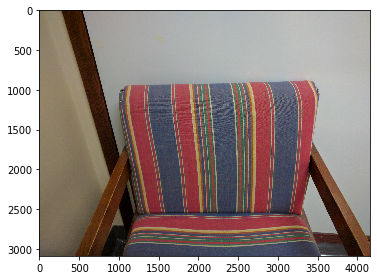

In [11]:
# Show image
skimage.io.imshow(image)

In [12]:
# Save image in different format
skimage.io.imsave(fname="chair.tif", arr=image)

### Resising an image
Write a program to read then resize an image by 50%

In [15]:
# Import libraries
# Uncomment if running this alone; already imported above
# import skimage.io 
import skimage.transform

In [16]:
# Read image
image = skimage.io.imread(fname="informalHeadshot.jpeg")

In [18]:
# Resize image
newShape = (image.shape[0] // 2, image.shape[1] // 2, image.shape[2])
smallImage = skimage.transform.resize(image=image, output_shape=newShape)

In [19]:
# Write out resized image to resized.jpg
skimage.io.imsave(fname="resized.jpg", arr=smallImage)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


### Ignore low-intensity pixels

In [20]:
# Import libraries
# Uncomment if running this alone; already imported above
# import skimage.io

In [21]:
# Read image
image = skimage.io.imread(fname="roots.jpg")

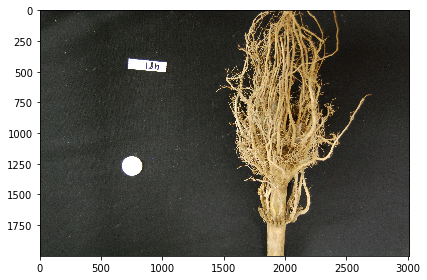

In [22]:
# Show original image
skimage.io.imshow(image)

In [23]:
# Keep only high-intensity pixels
image[image < 128] = 0

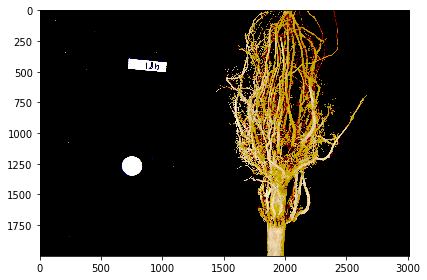

In [24]:
# Display modified image
skimage.io.imshow(image)

### Keep only low-intensity pixels

In [25]:
# Import libraries
# Uncomment if running this alone; already imported above
# import skimage.io

In [26]:
# Read image
image = skimage.io.imread(fname="sudoku.png")

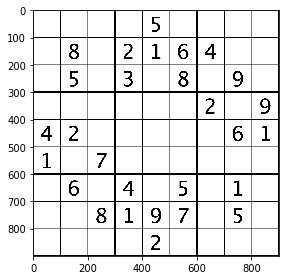

In [27]:
# Show original image
skimage.io.imshow(image)

In [28]:
# Keep only low-intensity pixels
image[image > 200] = 64
image.shape

(900, 900, 4)

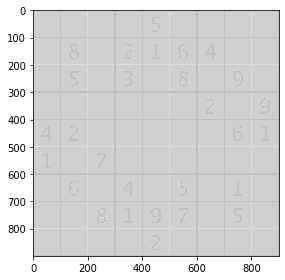

In [29]:
# Display modified image
skimage.io.imshow(image)

### Load a color image as grayscale

In [30]:
# Import libraries
# Uncomment if running this alone; already imported above
# import skimage.io
import skimage.color

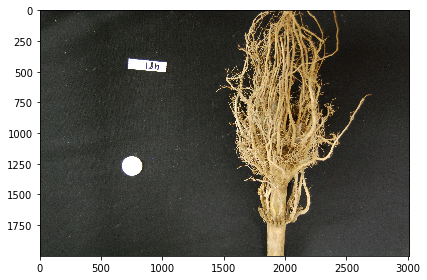

In [31]:
# Read image and display original
image = skimage.io.imread(fname="roots.jpg")
skimage.io.imshow(image)

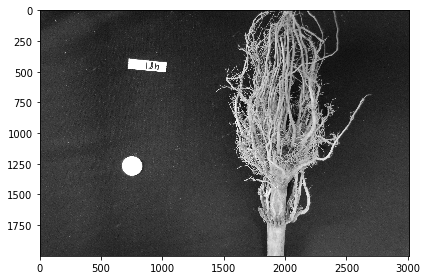

In [32]:
# Covert to grayscale and display
grayImage = skimage.color.rgb2gray(image)
skimage.io.imshow(grayImage)

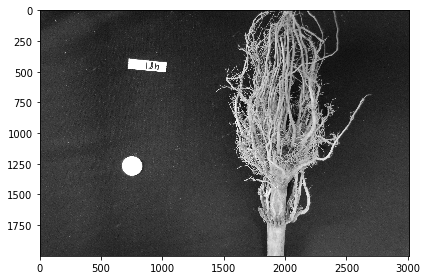

In [33]:
# Can also read as grayscale directly
image = skimage.io.imread(fname="roots.jpg", as_gray=True)
skimage.io.imshow(image)

### Clip image via slicing

In [34]:
# Import libraries
# Uncomment if running this alone; already imported above
# import skimage.io

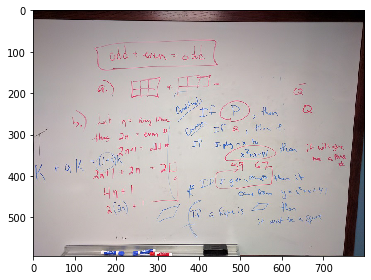

In [35]:
# Read image and display
image = skimage.io.imread(fname="board.jpg")
skimage.io.imshow(image)

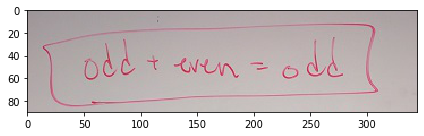

In [36]:
# Clip image (coordinates based on values from tutorial: from (135,60) to (480,150) in (x,y) coordinates)
clip = image[60:150,135:480,:]
skimage.io.imshow(clip)

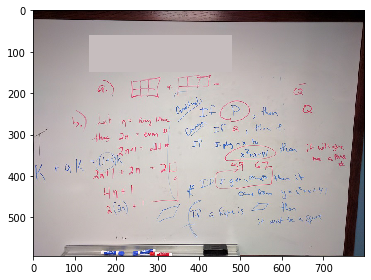

In [37]:
# Replace clipped area with sampled color
color = image[330,90]
image[60:150,135:480,:] = color
skimage.io.imshow(image)

### Crop maize roots image

In [38]:
# Import libraries
# Uncomment if running this alone; already imported above
# import skimage.io

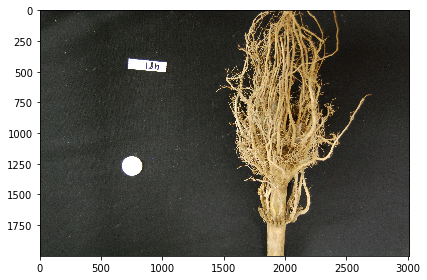

In [39]:
# Read and display original image
image = skimage.io.imread(fname="roots.jpg")
skimage.io.imshow(image)

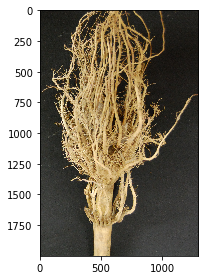

In [40]:
# Crop image, save, and display (used paint to find coordinates)
crop = image[:,1413:2705,:]
skimage.io.imsave(fname="rootsCropped.jpg", arr=crop)
skimage.io.imshow(crop)

### Metadata changes when reading and saving

In [41]:
# Import libraries
# Uncomment if running this alone; already imported above
# import skimage.io

In [42]:
# Read and save image
image = skimage.io.imread(fname="flowers-before.jpg")
skimage.io.imsave(fname="flowers-after.jpg", arr=image)

### Slicing and the colorimetric challenge

In [43]:
# Import libraries
# Uncomment if running this alone; already imported above
# import skimage.io
# import numpy as np

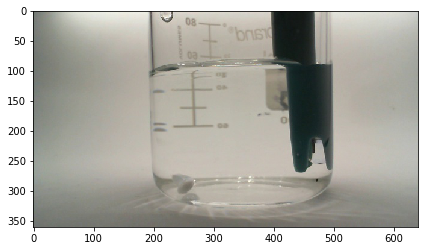

In [44]:
# Read image and display
image = skimage.io.imread(fname="titration.jpg")
skimage.io.imshow(image)

In [45]:
# Compute mean channel values for 10x10 pixel kernel within beaker then write out
avgRed = np.mean(image[220-10:220+10,334-10:334+10,0])
avgGreen = np.mean(image[220-10:220+10,334-10:334+10,1])
avgBlue = np.mean(image[220-10:220+10,334-10:334+10,2])

print(f'Avg. red value: {avgRed:.4f}')
print(f'Avg. green value: {avgGreen:.4f}')
print(f'Avg. blue value: {avgBlue:.4f}')

Avg. red value: 194.4725
Avg. green value: 189.7900
Avg. blue value: 178.4625


## Drawing and Bitwise Operations

* __mask__ - a special image where white pixels indicate regions of another image to keep and black pixels indicate those to discard
* __mask indexing__ - indexing with a boolean array

### Drawing rectangle and masking

In [46]:
# Import libraries
# Uncomment if running this alone; already imported above
#import skimage.io
import skimage.draw
#import numpy as np

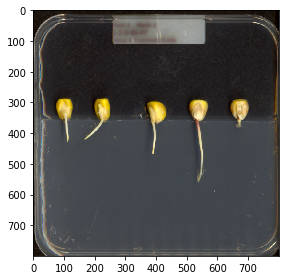

In [47]:
# Read image and display
image = skimage.io.imread(fname="maize-roots.tif")
skimage.io.imshow(image)

For a mask, we want to start with all false. This can be accomplished using `np.zeros` with an input parameter `dtype="bool"`. We can do the same thing for all true by replacing `np.zeros` with `np.ones`.

In [48]:
# Create mask with same shape as image.
# This is a numpy array of all True because 
# the boolean data type is selected. 
mask = np.zeros(shape=image.shape[0:2], dtype="bool")

Below, we use the `skimage.draw.rectangle` function to draw a rectangle. When using `skimage.draw`, the convention is to use `rr,cc` for the outputs because the rows and columns for the shape are reproduced multiple times in each array

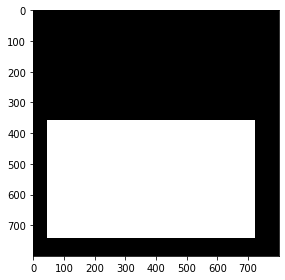

In [49]:
# Draw filled rectangle on mask
rr, cc = skimage.draw.rectangle(start=(357,44), end=(740,720))
mask[rr,cc] = True
# The same thing can be accomplished through slicing
#mask[357:741,44:721] = True
skimage.io.imshow(mask)

### Other drawing functions

In [50]:
# Import libraries
# Uncomment if running this alone; already imported above
#import skimage.io
#import skimage.draw
#import numpy as np
import random

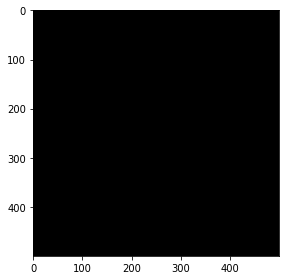

In [51]:
# Generate black box
image = np.zeros(shape=(500,500,3), dtype="uint8")
skimage.io.imshow(image)

/home/laurarnichols/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


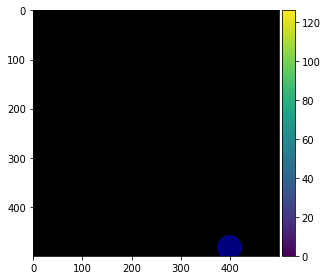

In [52]:
# Draw circle
rr, cc = skimage.draw.disk((random.randrange(500), random.randrange(500)), radius=25, shape=image.shape[0:2])
image[rr,cc,2] = 126
skimage.io.imshow(image)

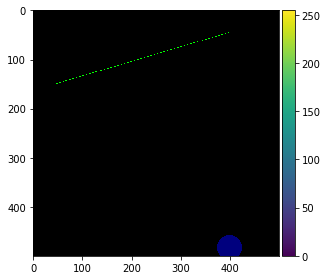

In [53]:
# Draw line
rr, cc = skimage.draw.line(random.randrange(500), random.randrange(500), random.randrange(500), random.randrange(500))
image[rr,cc,1] = 255
skimage.io.imshow(image)

### Applying mask

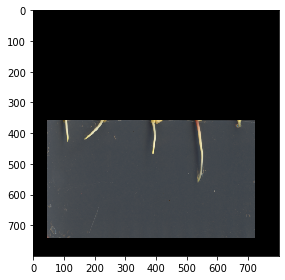

In [54]:
# Reload image and mask
image = skimage.io.imread(fname="maize-roots.tif")
mask = np.zeros(shape=image.shape[0:2], dtype="bool")
rr, cc = skimage.draw.rectangle(start=(357,44), end=(740,720))
mask[rr,cc] = True

# Apply mask to image and display
image[~mask] = 0
skimage.io.imshow(image)

### Mask wells to isolate colors

In [55]:
# Import libraries
# Uncomment if running this alone; already imported above
#import skimage.io
#import skimage.draw
#import numpy as np

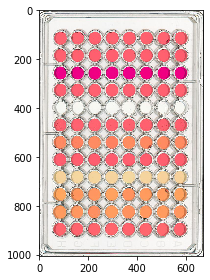

In [56]:
# Read original image and display
image = skimage.io.imread(fname="wellplate.jpg")
skimage.io.imshow(image)

In [57]:
# Data taken from examining image in paint
start = np.array([87, 114])
r = 24

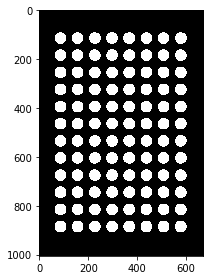

In [58]:
# Generate mask and display
mask = np.zeros(shape=image.shape[0:2], dtype="bool")

for row in range(8):
    for col in range(12):
        rr, cc = skimage.draw.disk((start[1]+col*70, start[0]+row*70), r)
        mask[rr,cc] = True

skimage.io.imshow(mask)

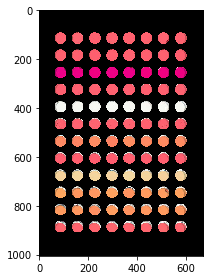

In [59]:
# Apply mask to image and display
image[~mask] = 0
skimage.io.imsave(fname="maskedWells.jpg", arr=image)
skimage.io.imshow(image)

## Creating Histograms

* __histogram__ - in the context of images, how frequently various color values occur

### Create grayscale histogram

In [60]:
# Import libraries
# Uncomment if running this alone; already imported above
#import skimage.io
#import skimage.draw
#import numpy as np
from matplotlib import pyplot as plt

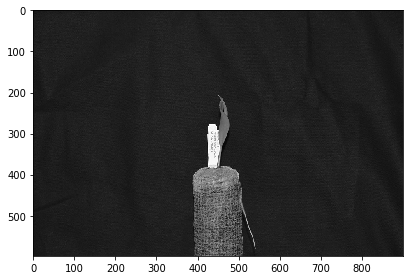

In [61]:
# Read image in grayscale and display
image = skimage.io.imread(fname="seedling.jpg", as_gray=True)
skimage.io.imshow(image)

In [62]:
# Create histogram
histogram, binEdges = np.histogram(image, bins=256, range=(0,1))

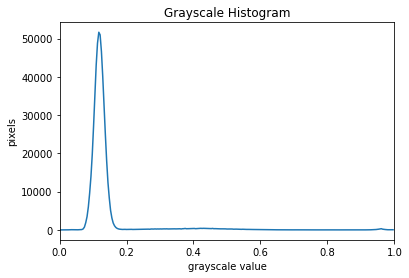

In [63]:
# Draw histogram

# Generate figure and label figure and axes
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")

# Set axis limits
plt.xlim([0.0, 1.0])

# Plot
plt.plot(binEdges[0:-1], histogram)
plt.show()

This whole process can also be accomplished using `plt.hist` which is meant for this purpose and visualizes the actual  histogram rather than a smooth curve

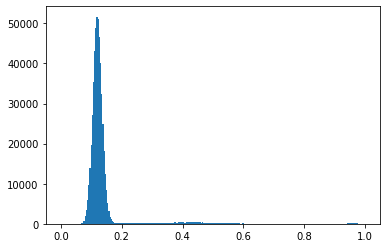

In [64]:
# Plot using plt.hist
plt.hist(image.flatten(), bins=256, range=(0,1))
plt.show()

Sometimes, certain colors overwhelm the histogram and wash out the interesting details, as in the case above with very dark pixels in the background. To help with this, instead of using the entire image we can apply a mask to isolate the interesting part of the image.

In [65]:
# Generate mask
mask = np.zeros(shape=image.shape, dtype="bool")
rr, cc = skimage.draw.rectangle(start=(199, 410), end=(384, 485))
mask[rr,cc] = True

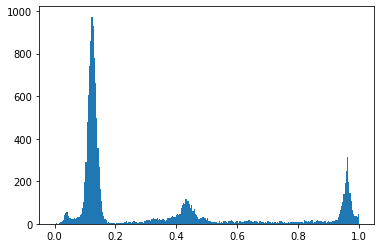

In [66]:
# Apply mask and regenerate histogram
plt.hist(image[mask].flatten(), bins=256, range=(0,1))
plt.show()

### Color histograms

In [67]:
# Import libraries
# Uncomment if running this alone; already imported above
#import skimage.io
#from matplotlib import pyplot as plt

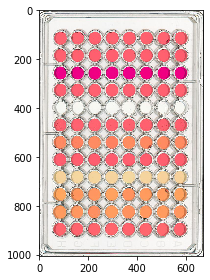

In [68]:
# Read original image and display
image = skimage.io.imread(fname="wellplate.jpg")
skimage.io.imshow(image)

In [69]:
# List colors for different plots and assign IDs
colors = ("r", "g", "b")
channelIds = (0, 1, 2)

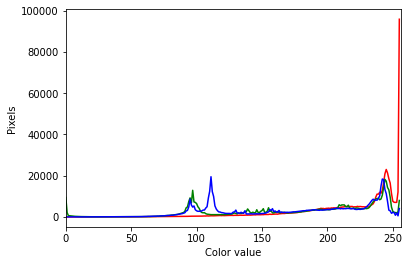

In [70]:
# Generate and plot histogram for each channel
for channelId, c in zip(channelIds, colors):
    histogram, binEdges = np.histogram(
        image[:,:,channelId], bins=256, range=(0,256)
    )
    plt.plot(binEdges[0:-1], histogram, color=c)
    
plt.xlim([0,256])
plt.xlabel("Color value")
plt.ylabel("Pixels")
plt.show()

### Color histogram with mask

In [71]:
# Import libraries
# Uncomment if running this alone; already imported above
#import skimage.io
#import skimage.draw
#import numpy as np

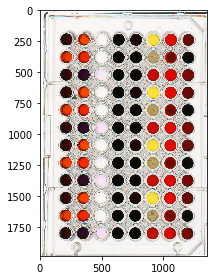

In [72]:
# Read original image and display
image = skimage.io.imread(fname="plate-01.tif")
skimage.io.imshow(image)

In [73]:
# Define position and radius of desired circle
pos = np.array([1053,241])
r = 46

/home/laurarnichols/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


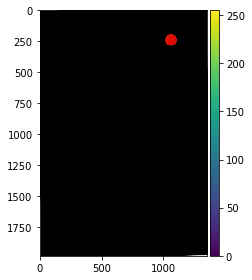

In [74]:
# Define and apply mask and display masked image

# Define mask
mask = np.zeros(shape=image.shape[0:2], dtype="bool")
rr, cc = skimage.draw.disk((pos[1], pos[0]), r)
mask[rr, cc] = True

# Apply mask
image[~mask,0:3] = 0

# Display masked image
skimage.io.imshow(image)

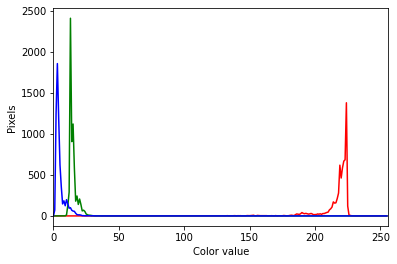

In [75]:
# Define and plot histogram
colors = ("r", "g", "b")
channelIds = (0, 1, 2)

for channelId, c in zip(channelIds, colors):
    histogram, binEdges = np.histogram(
        image[:,:,channelId][mask], bins=256, range=(0,256)
    )
    plt.plot(binEdges[0:-1], histogram, color=c)
    
plt.xlim([0,256])
plt.xlabel("Color value")
plt.ylabel("Pixels")
plt.show()

### Histograms for the morphometrics challenge

In [76]:
# Import libraries
# Uncomment if running this alone; already imported above
#import skimage.io
#from matplotlib import pyplot as plt
#import numpy as np
import glob
import cv2

_Note:_ The method used below for reading multiple files creates a _list_ of _arrays_. To access a single image, you can use `images[i]`. To access a single channel within an image, you must use `images[i][:,:,j]`.

In [77]:
# Read in files
images = [cv2.imread(file) for file in glob.glob("colonies*.tif")]

_Note:_ When reading files in with `cv2`, they will automatically be in BGR order as opposed to RGB. The `cv2.cvtColor` function used below reverses this order for plotting

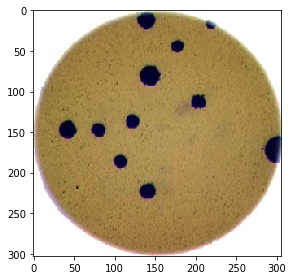

In [78]:
skimage.io.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))

#### Grayscale histograms

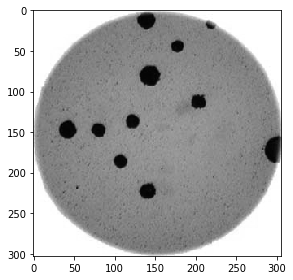

In [79]:
skimage.io.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY))

_Note:_ For grayscale `cv2` images, the range is from 0 to 256 rather than 0 to 1.

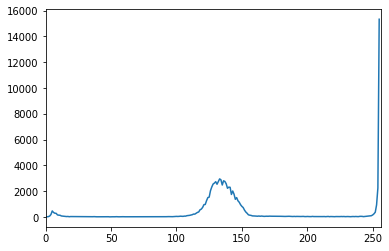

In [80]:
# Define histogram
histogram, binEdges = np.histogram(
    cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY), bins=256, range=(0,256))

# Set axis limits
plt.xlim([0, 256])

# Plot
plt.plot(binEdges[0:-1], histogram)
plt.show()

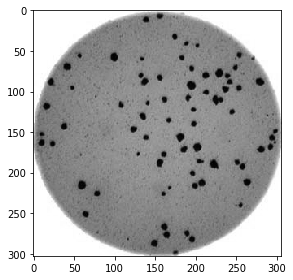

In [81]:
skimage.io.imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2GRAY))

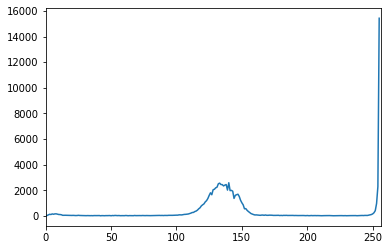

In [82]:
# Define histogram
histogram, binEdges = np.histogram(
    cv2.cvtColor(images[1], cv2.COLOR_BGR2GRAY), bins=256, range=(0,256))

# Set axis limits
plt.xlim([0, 256])

# Plot
plt.plot(binEdges[0:-1], histogram)
plt.show()

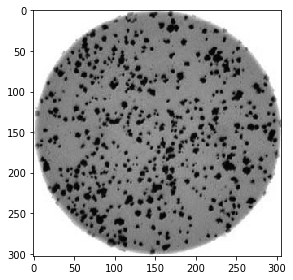

In [83]:
skimage.io.imshow(cv2.cvtColor(images[2], cv2.COLOR_BGR2GRAY))

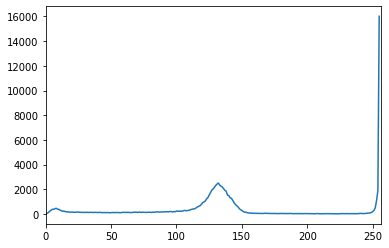

In [84]:
# Define histogram
histogram, binEdges = np.histogram(
    cv2.cvtColor(images[2], cv2.COLOR_BGR2GRAY), bins=256, range=(0,256))

# Set axis limits
plt.xlim([0, 256])

# Plot
plt.plot(binEdges[0:-1], histogram)
plt.show()

#### Color histograms

In [85]:
# List colors for different plots and assign IDs
colors = ("r", "g", "b")
channelIds = (0, 1, 2)

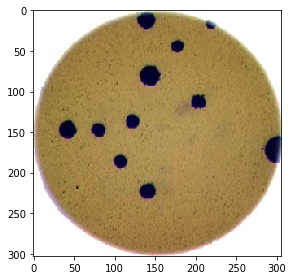

In [86]:
skimage.io.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))

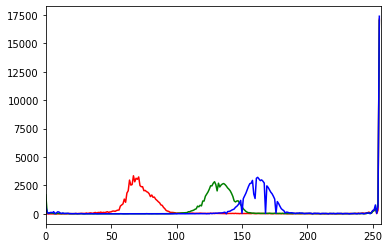

In [87]:
# Generate and plot histogram for each channel
for channelId, c in zip(channelIds, colors):
    histogram, binEdges = np.histogram(
        images[0][:,:,channelId], bins=256, range=(0,256)
    )
    plt.plot(binEdges[0:-1], histogram, color=c)
    
plt.xlim([0,256])
plt.show()

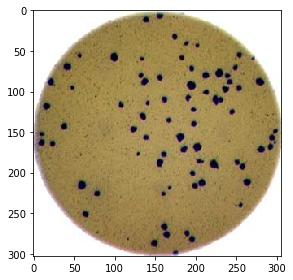

In [88]:
skimage.io.imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))

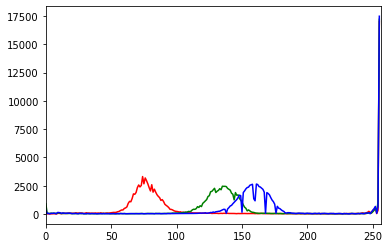

In [89]:
# Generate and plot histogram for each channel
for channelId, c in zip(channelIds, colors):
    histogram, binEdges = np.histogram(
        images[1][:,:,channelId], bins=256, range=(0,256)
    )
    plt.plot(binEdges[0:-1], histogram, color=c)
    
plt.xlim([0,256])
plt.show()

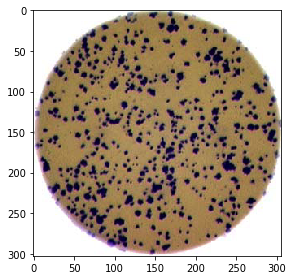

In [90]:
skimage.io.imshow(cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB))

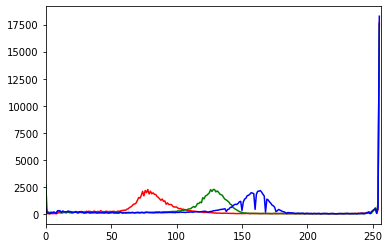

In [91]:
# Generate and plot histogram for each channel
for channelId, c in zip(channelIds, colors):
    histogram, binEdges = np.histogram(
        images[2][:,:,channelId], bins=256, range=(0,256)
    )
    plt.plot(binEdges[0:-1], histogram, color=c)
    
plt.xlim([0,256])
plt.show()

## Blurring Images

* Edge detection is important
* Can use blurring to smooth out edges due to noise
* Blurring is an example of applying a low-pass filter
* __low-pass filter__ - removing noise from an image while leaving the majority of the image intact
* There are many different blurring filters, but this tutorial focuses on Gaussian blurring
* Blurring takes a weighted average of the pixels in the kernel across each channel, with the pixels closest to the center given the most weight
* How the weight is distributed across the kernel is controlled by the `sigma` parameter to the filter which sets the width of the Gaussian
* __border modes__ - strategies for setting up the kernel for border pixels

In [92]:
# Import libraries
# Uncomment if running this alone; already imported above
#import skimage.io
import skimage.filters

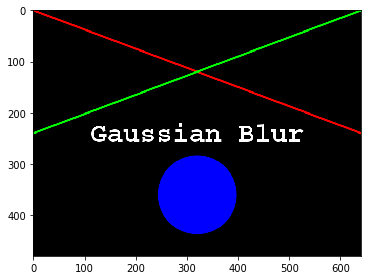

In [93]:
# Read in image and display
image = skimage.io.imread(fname="GaussianTarget.png")
skimage.io.imshow(image)

The `skimage.filters.gaussian()` function allows the use of 2 different sigmas in the x- and y- directions. The `truncate` parameter gives the radius of the kernel in terms of sigmas. 

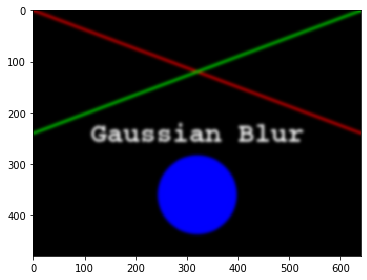

In [94]:
# Apply blurring filter and display
blurred = skimage.filters.gaussian(image, sigma=(3.0, 3.0), truncate=4, multichannel=True)
skimage.io.imshow(blurred)

Gaussian filters are often used to remove random noise while. For other kinds of noise (e.g., static noise) a median filter is typically used.

## Thresholding

* __thresholding__ - image segmentation where we change the pixels of an image to make the image easier to analyze; converts to black and white
* __fixed-level thresholding__ - takes the level to threshold at from the user

In [95]:
# Import libraries
# Uncomment if running this alone; already imported above
#import skimage.io
#import skimage.color
#import skimage.filters
#from matplotlib import pyplot as plt
#import numpy as np

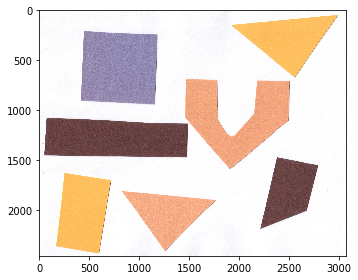

In [96]:
# Read image and display
image = skimage.io.imread(fname="junk.jpg")
skimage.io.imshow(image)

_Note:_ If your grayscale images displaying with a color bar, check the data type of the array. According to [this tutorial](https://matplotlib.org/stable/tutorials/introductory/images.html), 
>For RGB and RGBA images, Matplotlib supports float32 and uint8 data types. For grayscale, Matplotlib supports only float32.

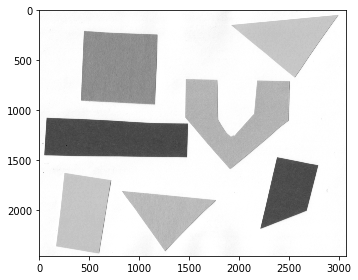

In [106]:
# Convert image to grayscale and blur then display
grayBlur = skimage.filters.gaussian(np.float32(skimage.color.rgb2gray(image)), sigma=2)
skimage.io.imshow(grayBlur)

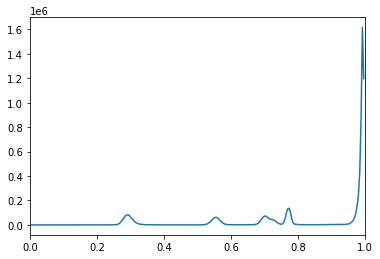

In [107]:
# Show histogram to determine threshold value
histogram, binEdges = np.histogram(grayBlur, bins=256, range=(0,1))

# Set axis limits
plt.xlim([0, 1])

# Plot
plt.plot(binEdges[0:-1], histogram)
plt.show()

Based on the graph above, 0.8 looks like a good threshold to eliminate all of the white in the image and focus on the shapes.

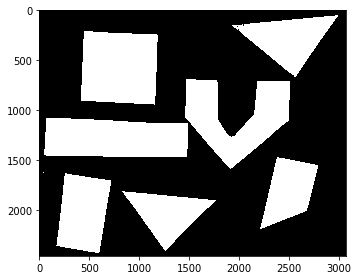

In [110]:
# Define mask using inverse (<) binary (0 or 1) thresholding and display
mask = grayBlur < 0.8
skimage.io.imshow(mask)

_Note:_ The `np.zeros_like` function returns an array of zeros of the same shape and type as the input array

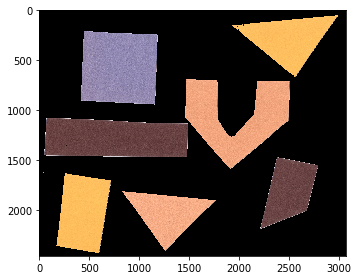

In [113]:
# Apply mask to original image to select the interesting part
selected = np.zeros_like(image)
selected[mask] = image[mask]

skimage.io.imshow(selected)

_Example:_

In [114]:
# Import libraries
# Uncomment if running this alone; already imported above
#import skimage.io
#import skimage.color
#import skimage.filters
#from matplotlib import pyplot as plt
#import numpy as np

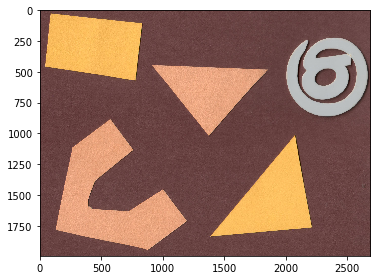

In [115]:
# Read image and display
image = skimage.io.imread(fname="more-junk.jpg")
skimage.io.imshow(image)

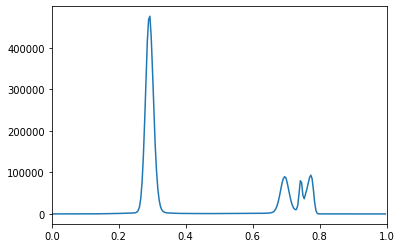

In [116]:
# Get histogram for grayscale, blurred image to set threshold for mask

# Convert image to grayscale and apply blur
grayBlur = skimage.filters.gaussian(skimage.color.rgb2gray(image), sigma=2)

# Define and display histogram
histogram, binEdges = np.histogram(grayBlur, bins=256, range=(0,1))

plt.xlim([0,1])

plt.plot(binEdges[0:-1], histogram)

Based on the histogram above, we want to threshold out anything below 0.6

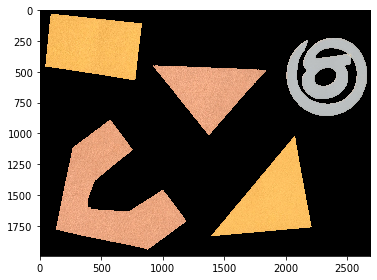

In [117]:
# Define and apply mask then display masked original

# Define mask
mask = grayBlur > 0.6

# Mask and display original
sel = np.zeros_like(image)
sel[mask] = image[mask]

skimage.io.imshow(sel)

### Adaptive thresholding

In [118]:
# Import libraries
# Uncomment if running this alone; already imported above
#import skimage.io
#import skimage.color
#import skimage.filters
#from matplotlib import pyplot as plt
#import numpy as np

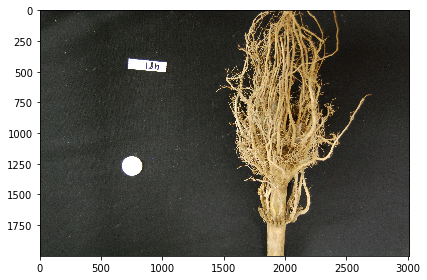

In [119]:
# Read image and display
image = skimage.io.imread(fname="roots.jpg")
skimage.io.imshow(image)

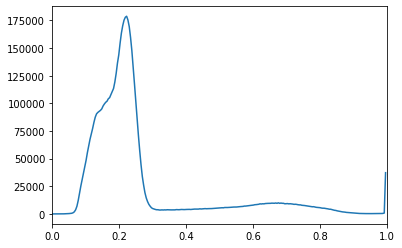

In [126]:
# Get histogram for grayscale, blurred image to set threshold for mask

# Convert image to grayscale and apply blur
grayBlur = skimage.filters.gaussian(skimage.color.rgb2gray(image), sigma=1)

# Define and display histogram
histogram, binEdges = np.histogram(grayBlur, bins=256, range=(0,1))

plt.xlim([0,1])

plt.plot(binEdges[0:-1], histogram)

__Adaptive thresholding__ sets the threshold automatically. _Otsu's method_ is useful when a picture has 2 peaks in a grayscale histogram, as in the one above (0.2 and 1)

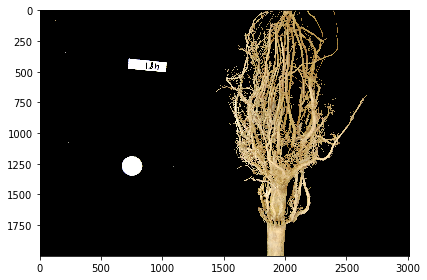

In [127]:
# Use adaptive thresholding to find the threshold using Otsu's method
# Define and apply mask then display masked original

# Define mask
mask = grayBlur > skimage.filters.threshold_otsu(grayBlur)

# Mask and display original
sel = np.zeros_like(image)
sel[mask] = image[mask]

skimage.io.imshow(sel)

The tutorial has an example of applying adaptive thresholding then calculating the mass ratio for multiple images. This requires the use of a bash script, so it cannot be done here. A modified copy is included below that runs on a single image.

In [144]:
"""
 * Python program to determine root mass, as a ratio of pixels in the
 * root system to the number of pixels in the entire image.
 *
 * usage: python RootMass.py <filename> <sigma>
"""

#import sys
import numpy as np
import skimage.io
import skimage.filters

# Get file name and sigma from the command line
#fileName = sys.argv[1]
#sigma = float(sys.argv[2])
fileName = "trial-016.jpg"
sigma = 1.5

# Read the original image, converting to grayscale
image = skimage.io.imread(fname=fileName, as_gray=True)

# Apply blur to image
blur = skimage.filters.gaussian(image, sigma=sigma)

# Use Otsu's method of adaptive thresholding to define mask
# then apply
binary = blur > skimage.filters.threshold_otsu(blur)

### Save mask in case want to examine
# Find index of the dot before the file extension
iDot = fileName.rindex('.')

# Add "_mask" after original file name before the extension
binaryFileName = fileName[:iDot] + "_binary" + fileName[iDot:]

# Save the mask using skimage.img_as_ubyte() to convert from binary
# to grayscale, which is needed if want to save as png
skimage.io.imsave(fname=binaryFileName, arr=skimage.img_as_ubyte(binary))
###

### Determine the root mass ratio
# Count the number of nonzero pixels in image
rootPixels = np.count_nonzero(binary)

# Determine the width and height of the image
w = binary.shape[1]
h = binary.shape[0]

# Calculate the density of white pixels
density = float(rootPixels)/(w*h)

# Output in csv format
print(fileName, density, sep=",")
###

trial-016.jpg,0.0482436835106383


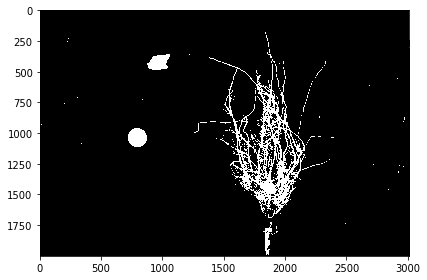

In [131]:
# Display binary mask
skimage.io.imshow(binary)

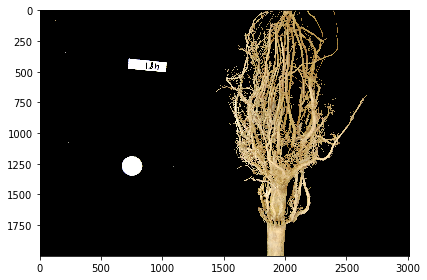

In [132]:
# Display filtered image
skimage.io.imshow(sel)

The method above is a good rough estimate, but the labels and size markers clearly affect the measurement. A better method would include removing the labels from the image. This can be done by applying a binary threshold before using Otsu's method.

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


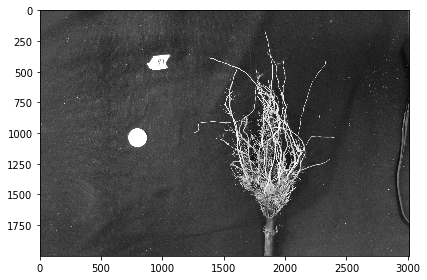

In [139]:
# Display original grayscale image
skimage.io.imshow(image)
skimage.io.imsave(fname="gray.jpg", arr=image)

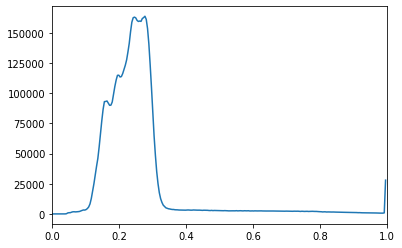

In [135]:
# Get histogram for grayscale, blurred image to set threshold for mask

# Apply blur to grayscale image
grayBlur = skimage.filters.gaussian(image, sigma=1.5)

# Define and display histogram
histogram, binEdges = np.histogram(grayBlur, bins=256, range=(0,1))

plt.xlim([0,1])

plt.plot(binEdges[0:-1], histogram)

Based on the histogram above, 0.9 would be a good binary threshold. However, after application too much of the actual root was removed. 0.95 seems to be a good balance between removing more of the label but not too much of the root. This is the value suggested by the tutorial.

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


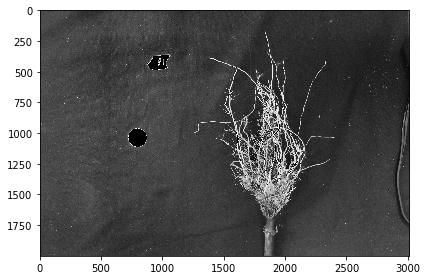

In [140]:
# Define and apply mask then display masked original

# Define mask
mask = grayBlur < 0.95

# Mask and display original
sel = np.zeros_like(image)
sel[mask] = image[mask]

skimage.io.imshow(sel)
skimage.io.imsave(fname="labelFiltered.jpg", arr=sel)

A better version of the long program above is given here, now including the binary thresholding to remove the label and size markers.

In [145]:
"""
 * Python program to determine root mass, as a ratio of pixels in the
 * root system to the number of pixels in the entire image.
 *
 * usage: python RootMass.py <filename> <sigma>
"""

#import sys
import numpy as np
import skimage.io
import skimage.filters

# Get file name and sigma from the command line
#fileName = sys.argv[1]
#sigma = float(sys.argv[2])
fileName = "trial-016.jpg"
sigma = 1.5

# Read the original image, converting to grayscale
image = skimage.io.imread(fname=fileName, as_gray=True)

# Apply blur to image
blur = skimage.filters.gaussian(image, sigma=sigma)

# Apply binary threshold to remove labels and size markers
blur[blur > 0.95] = 0

# Use Otsu's method of adaptive thresholding to define mask
# then apply
binary = sel > skimage.filters.threshold_otsu(sel)

### Save mask in case want to examine
# Find index of the dot before the file extension
iDot = fileName.rindex('.')

# Add "_mask" after original file name before the extension
binaryFileName = fileName[:iDot] + "_binary" + fileName[iDot:]

# Save the mask using skimage.img_as_ubyte() to convert from binary
# to grayscale, which is needed if want to save as png
skimage.io.imsave(fname=binaryFileName, arr=skimage.img_as_ubyte(binary))
###

### Determine the root mass ratio
# Count the number of nonzero pixels in image
rootPixels = np.count_nonzero(binary)

# Determine the width and height of the image
w = binary.shape[1]
h = binary.shape[0]

# Calculate the density of white pixels
density = float(rootPixels)/(w*h)

# Output in csv format
print(fileName, density, sep=",")
###

trial-016.jpg,0.04089594414893617


## Edge Detection

* Edges are not as sudden as they might appear 
* This tutorial uses Canny edge detection that:
    1. Applies a Gaussian blur (so don't do that yourself)
    2. Performs Sobel edge detection, which finds the maxima of the pixel gradient in the x and y directions
    3. Removes highlighted pixels that are too far from any edge, resulting in thinner lines (called __non-maximum supression__)
    4. Applies a double threshold to determine potential edges. This process eliminates noise or small variations and determines candidates based on the Sobel gradient. If the pixel value is above `high_threshold` it's turned on (strong candidate), below `low_threshold` it's turned off, and between it's considered a weak candidate.
    5. Selects final edge pixels by determining the connection between strong candidate pixels

In [8]:
# Import libraries
# Uncomment if running this alone; already imported above
#import skimage.io
import skimage.feature
#import numpy as np

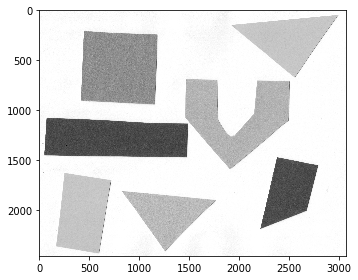

In [3]:
# Read image and display
image = skimage.io.imread(fname="junk.jpg", as_gray=True)
skimage.io.imshow(image)

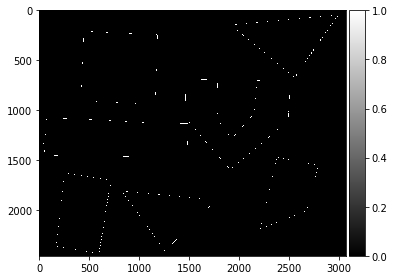

In [10]:
# Apply Canny edge detection and display
edges = skimage.feature.canny(
    image = image,
    sigma = 2.0, 
    low_threshold = 0.1,
    high_threshold = 0.3
)
skimage.io.imshow(np.float32(edges), cmap='gray')

## Connected Component Analysis

* 1-jump neighborhood is all pixels reachable with a single (non-diagononal step) (i.e., nearest neighbors)
* The 2-jump neighborhood is all those reachable with 2 *orthogonal* jumps (i.e., you can't move across a row twice, it would have to be across then up or down a column)
* __4-neighborhood__ -

```
- x -
x o x
- x -
```

* __8-neighborhood__ -

```
x x x
x o x
x x x
```

* Connected component analysis (CCA) takes a thresholded image (binary mask) and produces a labeled image where pixels with the same value belong to the same object

In [1]:
# Import libraries
# Uncomment if running this alone; already imported above
#import skimage.io
#import skimage.filters
#import numpy as np
#import skimage.color
#from matplotlib import pyplot as plt
import skimage.measure

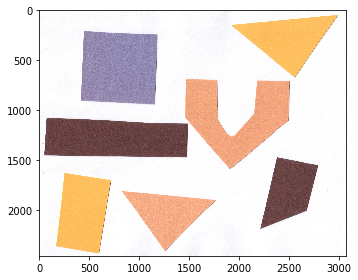

In [2]:
# Read and display original image
image = skimage.io.imread(fname="junk.jpg")
skimage.io.imshow(image)

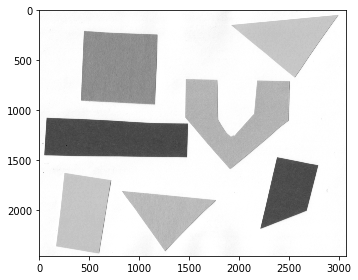

In [3]:
# Convert image to grayscale and blur (before thresholding) then display
grayBlur = skimage.filters.gaussian(np.float32(skimage.color.rgb2gray(image)), sigma=2)
skimage.io.imshow(grayBlur)

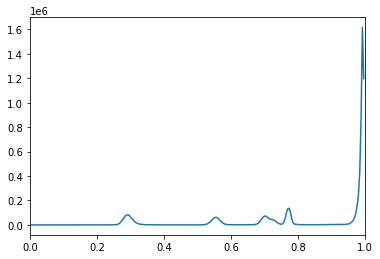

In [4]:
# Show histogram to determine threshold value
histogram, binEdges = np.histogram(grayBlur, bins=256, range=(0,1))

# Set axis limits
plt.xlim([0, 1])

# Plot
plt.plot(binEdges[0:-1], histogram)
plt.show()

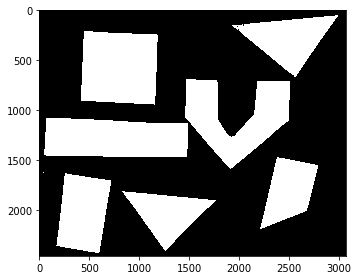

In [5]:
# Define mask based on threshold and display
mask = grayBlur < 0.8
skimage.io.imshow(mask)

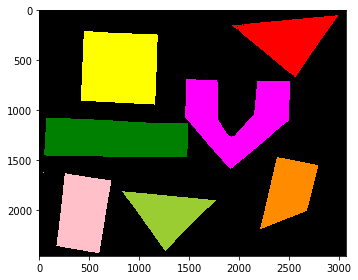

In [28]:
# Perform CCA on the mask then display
labelImage = skimage.measure.label(mask, connectivity=2)
coloredLabelImage = skimage.color.label2rgb(labelImage, bg_label=0)
skimage.io.imshow(coloredLabelImage)

In [29]:
# Determine the number of images found
numObjs = np.max(labelImage)
numObjs

10

The number of objects found is not correct, but it is close. The number of objects detected will depend on the `sigma` used for blurring and the threshold. A higher `sigma` risks merging objects incorrectly, and a higher threshold will pick up noise as objects. We can visualize the areas of each of the detected objects to determine how many objects we are actually looking at. This can be done in many ways, such as with point plots or pie charts.

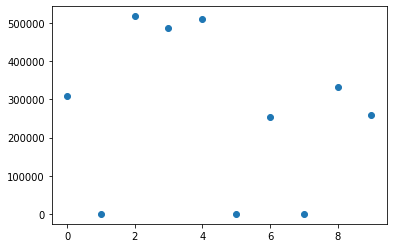

In [52]:
# Compute object features and extract object areas, then plot
objectFeatures = skimage.measure.regionprops(labelImage)
objectAreas = [objf["area"] for objf in objectFeatures]
plt.plot(objectAreas,'o')

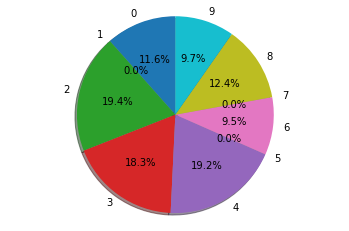

In [53]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = range(0,numObjs)
sizes = objectAreas

fig1, ax1 = plt.subplots()
ax1.pie(objectAreas, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

To only pick up the objects with a significant area, lets choose those with at least 5% the size of the largest object.

In [58]:
# Calculate the max object area, then count the number of objects
# with at least 5% the area as the largest object
maxArea = np.max(objectAreas)

filteredObjCount = sum(area >= 0.05*maxArea for area in objectAreas)
filteredObjCount

7

## Morphometric challenge

Count the number of bacteria colonies in the images below and produce an image with the colonies highlighted and outlined.

In [1]:
# Import libraries
# Uncomment if running this alone; already imported above
import skimage.io
import skimage.filters
from matplotlib import pyplot as plt
import numpy as np
import glob
import cv2

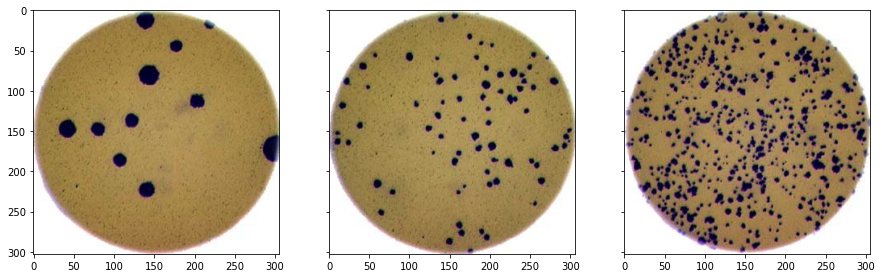

In [30]:
# Read in and display images
images = [cv2.imread(file) for file in glob.glob("colonies*.tif")]

fig, axs = plt.subplots(1,3, sharey=True, figsize=(15,5))

for i in range(0,3):
    axs[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))

_Important:_ The objects we are interested in identifying and counting here are all black. If we follow the process from earlier in the tutorial exactly, we will end up with images with a lot of black. That would be useless. Instead, we will invert the images so that the intersting objects are brighter. Then we will be able to follow the thresholding logic from earlier in the workshop.

0.9921875
0.99609375
0.99609375


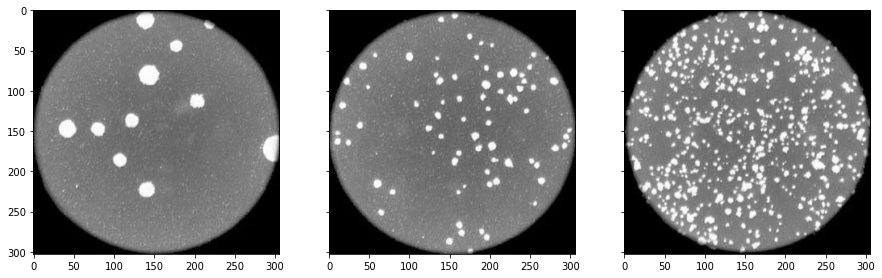

In [38]:
# Grayscale and invert images
# Generate and display grayscale histograms
fig, axs = plt.subplots(1,3, sharey=True, figsize=(15,5))

grayInv = []

for i in range(0,3):
    # Grayscale and invert
    grayInv.append(cv2.bitwise_not(cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY))/256.0)
    axs[i].imshow(grayInv[i],cmap='gray')
    
    # Check that we are between 0 and 1 for true grayscale
    print(np.max(grayInv[i])) 

0.9921875
0.99609375
0.99609375


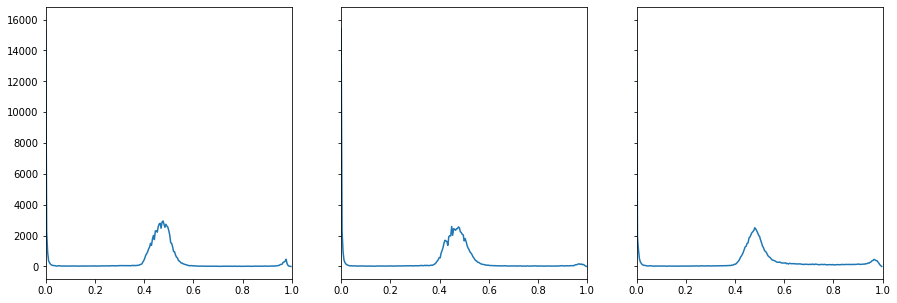

In [36]:
# Generate and display grayscale histograms
fig, axs = plt.subplots(1,3, sharey=True, figsize=(15,5))

for i in range(0,3):
    # Define histogram
    histogram, binEdges = np.histogram(
        grayInv[i], bins=256, range=(0,1))

    # Set axis limits
    axs[i].set_xlim([0, 1])

    # Plot
    axs[i].plot(binEdges[0:-1], histogram)

We want to ignore the part of the image that is outside of the dish completely (the peak around 0.0). We also want to ignore the substrate (peak around 0.5) and only focus on the bacteria colonies (~> 0.6). The do this, we will use a binary threshold to ignore everything below 0.6.

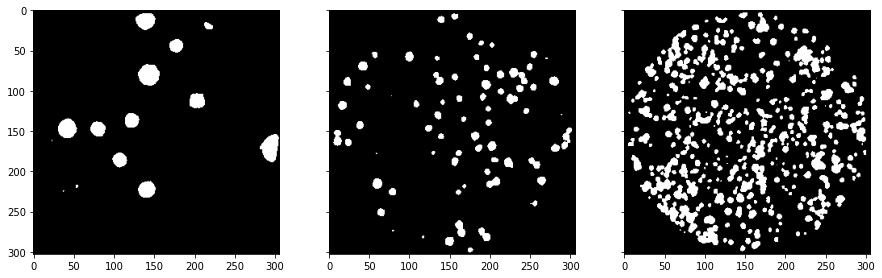

In [55]:
# Use binary thresholding to get rid of white peak
# Define and apply mask then display masked original

# Set up subplots
fig, axs = plt.subplots(1,3, sharey=True, figsize=(15,5))

# Define empty list for masks
mask = []

for i in range(0,3):    
    # Convert image to grayscale and apply blur
    grayBlur = skimage.filters.gaussian(grayInv[i], sigma=1)
    #axs[i].imshow(np.float32(grayBlur), cmap='gray')
    
    # Define mask and display
    mask.append(grayBlur > 0.6)
    axs[i].imshow(mask[i], cmap='gray')

    # Mask and display original
    #sel = np.zeros_like(grayBlur)
    #sel[mask[i]] = grayBlur[mask[i]]
    #axs[i].imshow(sel, cmap='gray')
    
    

_Note:_ Make sure to only use binary images for CCA as grayscale images (even if they look black and white) will not have clear enough connections to define objects because of pixel variation

14
70
252


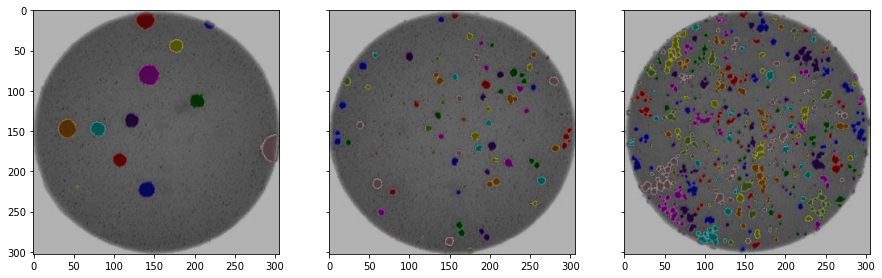

In [62]:
# Perform CCA on the binary thresholded images then display
# over grayscale originals

# Set up subplots
fig, axs = plt.subplots(1,3, sharey=True, figsize=(15,5))

for i in range(0,3):
    labelImage = skimage.measure.label(mask[i], connectivity=2)
    print(np.max(labelImage))
    
    coloredLabelImage = skimage.color.label2rgb(labelImage, image=images[i], bg_label=0)
    axs[i].imshow(coloredLabelImage)

### Questions and further work

* This tutorial used `skimage.measure.label`. How would other segmentation algorithms compare?
* How would we distinguish objects that are touching but are different?

## Colorimetric challenge

Plot the average value of each channel in a specfic kernel over time (video)

In [2]:
# Import libraries
# Uncomment if running this alone; already imported above
import skimage.io
from matplotlib import pyplot as plt
import numpy as np
import glob
import cv2

To read in the video, I used the command-line utility `ffmpeg` with the command `ffmpeg -i "titration.wmv" -f image2 "titration%05d.png"`

In [4]:
# Read images
images = [cv2.imread(file) for file in glob.glob("titrationImages/titration*.png")]

(0.0, 256.0)

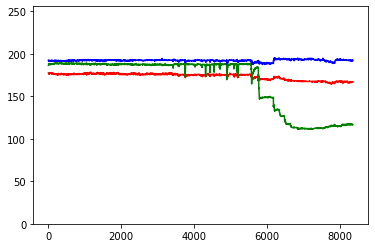

In [14]:
# Compute mean channel values for 10x10 pixel kernel within beaker then write out and plot

# Set up empty lists
avgRed = []
avgGreen = []
avgBlue = []

# Open csv file (write over file if exists)
f = open("titration.csv", "w")

for i in range(len(images)):
    avgRed.append(np.mean(images[i][220-10:220+10,334-10:334+10,0]))
    avgGreen.append(np.mean(images[i][220-10:220+10,334-10:334+10,1]))
    avgBlue.append(np.mean(images[i][220-10:220+10,334-10:334+10,2]))
    
    f.write(f'{avgRed[i]:.4f}, {avgGreen[i]:.4f}, {avgBlue[i]:.4f}\n')
    
f.close()
    
plt.plot(avgRed, 'r')
plt.plot(avgGreen, 'g')
plt.plot(avgBlue, 'b')
plt.ylim([0,256])